In [1]:
#mount my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import the dataset by going into drive, then MyDrive then click the folder then "copy path"
#import basic python libraries
import pandas as pd
import numpy as np
fpadata = pd.read_excel("/content/drive/MyDrive/Applied Machine Learning/FPA Dataset.xlsx")

In [3]:
#print an initial view of the top 10 rows
fpadata.head(10)

,Building,Business Area,Account_Key,Account,Exercise Type,Month,Value
0,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-01-01,-617.0
1,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-02-01,-617.0
2,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-03-01,-617.0
3,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-04-01,-617.0
4,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-05-01,-617.0
5,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-06-01,-617.0
6,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-07-01,-617.0
7,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-08-01,-617.0
8,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-09-01,-617.0
9,Office Building 4,Corporate,Account_Affiliate Contracts,Affiliate Contracts,Budget,2022-10-01,-617.0


In [4]:
#use the describe function to take a look at the numeric columns
#ignore month
fpadata.describe()

,Month,Value
count,2838,2838.000000
mean,2022-11-21 02:32:43.636363520,10195.092759
min,2022-01-01 00:00:00,-26605.000000
25%,2022-06-01 00:00:00,0.000000
50%,2022-11-16 00:00:00,872.000000
75%,2023-05-01 00:00:00,8226.562500
max,2023-12-01 00:00:00,169312.000000
std,NaN,28231.040431


In [5]:
#get a row and column count
print(fpadata.shape)

(2838, 7)


In [6]:
fpadata.info() #check for numeric columns and learn the data type for the month column
#bc there are no nulls so we will skip any null checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Building       2838 non-null   object        
 1   Business Area  2838 non-null   object        
 2   Account_Key    2838 non-null   object        
 3   Account        2838 non-null   object        
 4   Exercise Type  2838 non-null   object        
 5   Month          2838 non-null   datetime64[ns]
 6   Value          2838 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 155.3+ KB


In [7]:
#create a new dataframe that eliminates columns useless to our analyses
# all rows are for Building 4, Business Area = Corporate and the Account Key is the same as Account
fpadata1 = fpadata.drop(['Building', 'Business Area', 'Account_Key'], axis=1)
#check the shape again to make sure
print(fpadata1.shape)

(2838, 4)


In [8]:
#look at the new df top 10 rows to make sure that worked
fpadata1.head(10)

,Account,Exercise Type,Month,Value
0,Affiliate Contracts,Budget,2022-01-01,-617.0
1,Affiliate Contracts,Budget,2022-02-01,-617.0
2,Affiliate Contracts,Budget,2022-03-01,-617.0
3,Affiliate Contracts,Budget,2022-04-01,-617.0
4,Affiliate Contracts,Budget,2022-05-01,-617.0
5,Affiliate Contracts,Budget,2022-06-01,-617.0
6,Affiliate Contracts,Budget,2022-07-01,-617.0
7,Affiliate Contracts,Budget,2022-08-01,-617.0
8,Affiliate Contracts,Budget,2022-09-01,-617.0
9,Affiliate Contracts,Budget,2022-10-01,-617.0


In [9]:
#search for duplicate rows
fpadata1.duplicated()
duplicate_rows_fpadata1 = fpadata1[fpadata1.duplicated()]
print(duplicate_rows_fpadata1.shape)
#there are zero rows that have duplicate values across all columns - great

(0, 4)


In [10]:
print(fpadata1.isnull().sum()) #nice, never hurts to make a list and check it twice

Account          0
Exercise Type    0
Month            0
Value            0
dtype: int64


In [11]:
#cleaning the data to attempt to avoid NaN values

# Remove parentheses, commas, and dollar signs from the 'Value' column
fpadata1['Value'] = fpadata1['Value'].replace({r'[\$,()]': ''}, regex=True)

# Convert the cleaned values to numeric type (optional)
fpadata1['Value'] = pd.to_numeric(fpadata1['Value'])

#print(fpadata1.tail(20))

In [12]:
#create a pivot table from the data for easier comparison
pivot_fpadata1 = fpadata1.pivot_table(index=['Account', 'Month'], columns='Exercise Type', values='Value').reset_index()

# calculate variance
pivot_fpadata1['Budget Variance'] = pivot_fpadata1['Actuals'] - pivot_fpadata1['Budget']
pivot_fpadata1['Forecast Variance'] = pivot_fpadata1['Actuals'] - pivot_fpadata1.get('Forecast', 0)  # Adjust if Forecast exists

#print the head and tail to get a general idea of how this worked
print(pivot_fpadata1)

#convert this pivot table to it's own csv to work with separately
#save it to my working directory
pivot_fpadata1.to_csv('pivot_fpadata1_export.csv', index=False)

#download the csv to my local computer just so I have it
#from google.colab import files
#files.download('pivot_fpadata1_export.csv')

#we can see here that we have several missing values
#Further investigation into the dataset shows that this is inherent to the dataset
#some account types are only done quarterly (hence why 25% data types are missing) - such as window cleaning
#as we can see in the tail printout of this pivot table

Exercise Type              Account      Month  Actuals  Budget  Forecast  \
0              Affiliate Contracts 2022-01-01  -617.42  -617.0   -617.42   
1              Affiliate Contracts 2022-02-01  -617.42  -617.0   -617.42   
2              Affiliate Contracts 2022-03-01  -617.42  -617.0   -617.42   
3              Affiliate Contracts 2022-04-01  -632.86  -617.0   -632.86   
4              Affiliate Contracts 2022-05-01  -632.86  -617.0   -632.86   
...                            ...        ...      ...     ...       ...   
1027               Window Cleaning 2023-08-01      NaN  1232.0   -109.00   
1028               Window Cleaning 2023-09-01      NaN  1232.0    292.00   
1029               Window Cleaning 2023-10-01      NaN  1232.0    -32.00   
1030               Window Cleaning 2023-11-01      NaN  1232.0     50.00   
1031               Window Cleaning 2023-12-01      NaN  1232.0   -154.00   

Exercise Type  Budget Variance  Forecast Variance  
0                        -0.42     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

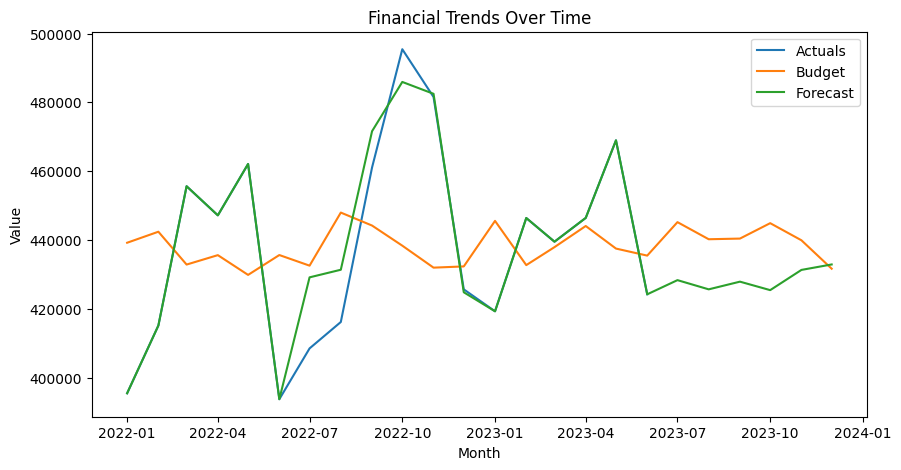

In [13]:
#here is one of the visualization libraries I am comfortable with
import matplotlib.pyplot as plt

#convert Month column to datetime
fpadata1['Month'] = pd.to_datetime(fpadata1['Month'])

#aggregate data by month using a groupby
monthly_trends = fpadata1.groupby(['Month', 'Exercise Type'])['Value'].sum().unstack()

#plot trends to see any seasonal fluctuations
plt.figure(figsize=(10, 5))
for col in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[col], label=col)

plt.title('Financial Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

#this type of plot is great because it can showcase how budgets compare to actuals and forecast over time

In [14]:
#create separate dataframes to do forecasting
#we want 3 main types of accounts, based on the magnitude of the dollar values and the
#category of the expenses

# Create a DataFrame with rows where Account equals "Building Rent"
building_rent_df = fpadata1[fpadata1['Account'] == 'Building Rent']

# Create a DataFrame with rows where Account equals "Depreciation - Building Improvements"
depreciation_building_improvements_df = fpadata1[fpadata1['Account'] == 'Depreciation - Building Improvements']

# Create a DataFrame with all rows except where Account equals "Building Rent" or "Depreciation - Building Improvements"
other_accounts_df = fpadata1[~fpadata1['Account'].isin(['Building Rent', 'Depreciation - Building Improvements'])]

#check to make sure this worked
print(building_rent_df.head(5))
print(depreciation_building_improvements_df.head(5))
print(other_accounts_df.head(5))


          Account Exercise Type      Month      Value
66  Building Rent        Budget 2022-01-01  164531.25
67  Building Rent        Budget 2022-02-01  164531.25
68  Building Rent        Budget 2022-03-01  164531.25
69  Building Rent        Budget 2022-04-01  164531.25
70  Building Rent        Budget 2022-05-01  164531.25
                                  Account Exercise Type      Month     Value
528  Depreciation - Building Improvements        Budget 2022-01-01  77642.82
529  Depreciation - Building Improvements        Budget 2022-02-01  77642.82
530  Depreciation - Building Improvements        Budget 2022-03-01  77642.82
531  Depreciation - Building Improvements        Budget 2022-04-01  77642.82
532  Depreciation - Building Improvements        Budget 2022-05-01  77642.82
               Account Exercise Type      Month  Value
0  Affiliate Contracts        Budget 2022-01-01 -617.0
1  Affiliate Contracts        Budget 2022-02-01 -617.0
2  Affiliate Contracts        Budget 2022-03-01 -

In [15]:
#import more libraries for time series/forecasting
from prophet import Prophet
import logging #to help get rid of debug/dependency and warning msgs

#suppress logging messages
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

#notes for anyone viewing this type of plot for the first time:

#Black Dots: These represent the actual data points from the time series.
#Blue Line: This is the forecasted trend generated by the Prophet model.
#Light Blue Shaded Area: This represents the uncertainty interval of the forecast, indicating the range
#within which the actual values are expected to fall with a certain probability.

#this type of tool predicts future financial performance based on historical trends.
#Forecasted Trend Line Data: This gives the trend values for each date in the forecast.
#Slope of the Forecasted Trend Line: This gives the rate of change of the trend over the forecast period.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


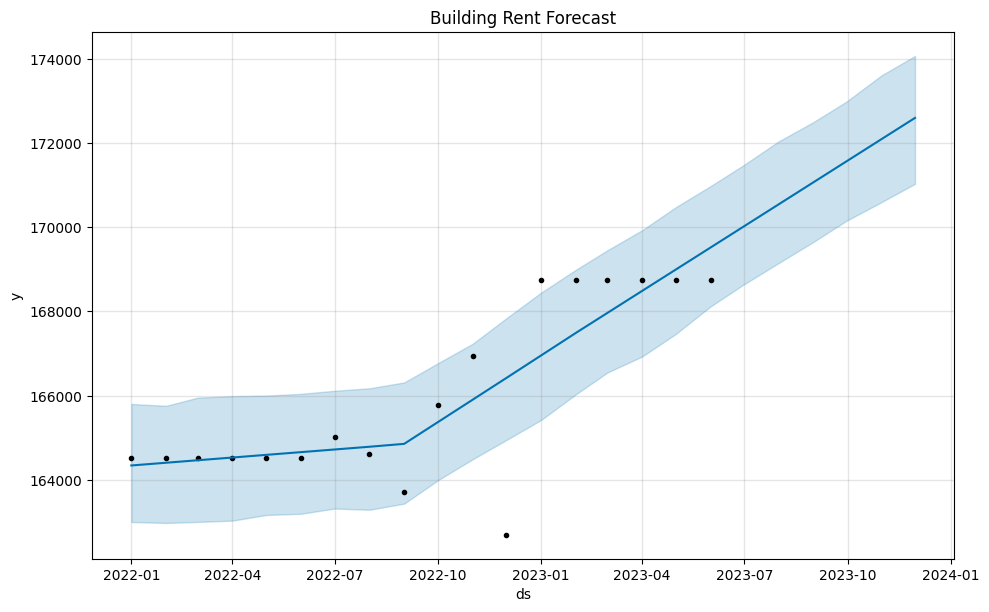

Forecasted Trend Line Data:
           ds          trend
0  2022-01-01  164344.443750
1  2022-02-01  164409.398133
2  2022-03-01  164468.066570
3  2022-04-01  164533.020984
4  2022-05-01  164595.880090
5  2022-06-01  164660.834559
6  2022-07-01  164723.693771
7  2022-08-01  164788.846044
8  2022-09-01  164857.370243
9  2022-10-01  165372.613926
10 2022-11-01  165905.197399
11 2022-12-01  166420.600872
12 2023-01-01  166956.225075
13 2023-02-01  167491.847200
14 2023-03-01  167964.930329
15 2023-04-01  168488.700936
16 2023-05-01  168995.575716
17 2023-06-01  169519.346323
18 2023-06-30  170009.325278
19 2023-07-31  170533.095884
20 2023-08-31  171056.866491
21 2023-09-30  171563.741271
22 2023-10-31  172087.511878
23 2023-11-30  172594.386659

Slope of the Forecasted Trend Line:
343.74762119772885


In [22]:
#rename columns for Prophet modelling
forecast_df1 = building_rent_df[building_rent_df['Exercise Type'] == 'Actuals'][['Month', 'Value']]
forecast_df1.rename(columns={'Month': 'ds', 'Value': 'y'}, inplace=True)

#initialize and fit Prophet model
model1 = Prophet()
model1.fit(forecast_df1)

#predict next 6 months
future1 = model1.make_future_dataframe(periods=6, freq='M')
forecast1 = model1.predict(future1)

#plot forecast
model1.plot(forecast1)
plt.title('Building Rent Forecast')
plt.show()

#extract numeric data from forecasted trend line for more comprehensive reporting
trend1 = forecast1[['ds', 'trend']]
slope1 = (trend1['trend'].iloc[-1] - trend1['trend'].iloc[0]) / len(trend1)

print("Forecasted Trend Line Data:")
print(trend1)

print("\nSlope of the Forecasted Trend Line:")
print(slope1)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


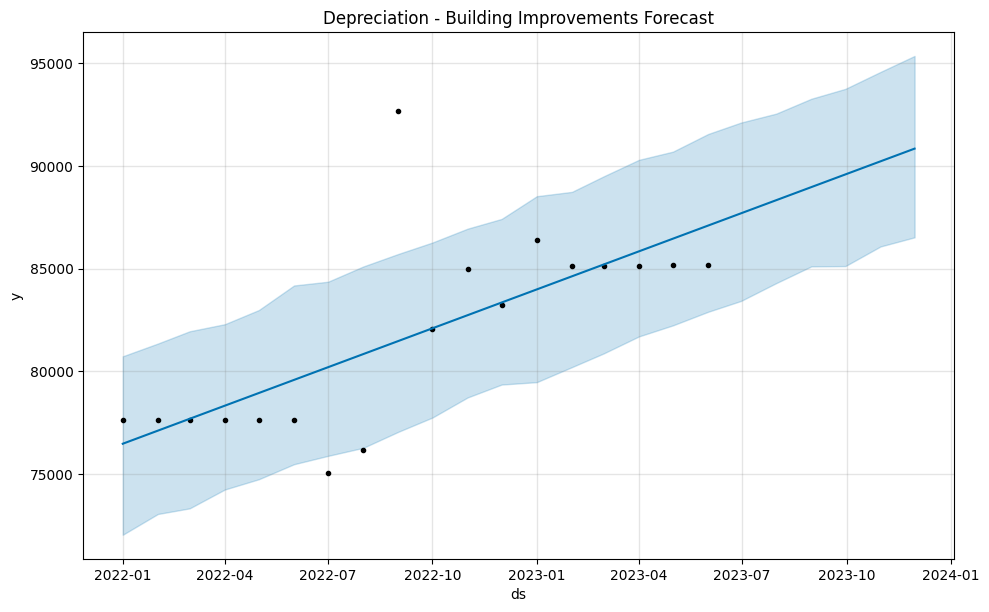

Forecasted Trend Line Data:
           ds         trend
0  2022-01-01  76471.603091
1  2022-02-01  77109.741120
2  2022-03-01  77686.123843
3  2022-04-01  78324.261867
4  2022-05-01  78941.814792
5  2022-06-01  79579.952826
6  2022-07-01  80197.505749
7  2022-08-01  80835.643771
8  2022-09-01  81473.781777
9  2022-10-01  82091.334691
10 2022-11-01  82729.431626
11 2022-12-01  83346.944768
12 2023-01-01  83984.909195
13 2023-02-01  84622.850450
14 2023-03-01  85199.055451
15 2023-04-01  85836.996704
16 2023-05-01  86454.359206
17 2023-06-01  87092.300458
18 2023-06-30  87689.084210
19 2023-07-31  88327.025462
20 2023-08-31  88964.966714
21 2023-09-30  89582.329216
22 2023-10-31  90220.270469
23 2023-11-30  90837.632971

Slope of the Forecasted Trend Line:
598.5845783032534


In [23]:
#rename columns for Prophet modelling
forecast_df2 = depreciation_building_improvements_df[depreciation_building_improvements_df['Exercise Type'] == 'Actuals'][['Month', 'Value']]
forecast_df2.rename(columns={'Month': 'ds', 'Value': 'y'}, inplace=True)

#initialize and fit Prophet model
model2 = Prophet()
model2.fit(forecast_df2)

#predict next 6 months
future2 = model2.make_future_dataframe(periods=6, freq='M')
forecast2 = model2.predict(future2)

#plot forecast
model2.plot(forecast2)
plt.title('Depreciation - Building Improvements Forecast')
plt.show()


#extract numeric data from forecasted trend line for more comprehensive reporting
trend2 = forecast2[['ds', 'trend']]
slope2 = (trend2['trend'].iloc[-1] - trend2['trend'].iloc[0]) / len(trend2)

print("Forecasted Trend Line Data:")
print(trend2)

print("\nSlope of the Forecasted Trend Line:")
print(slope2)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


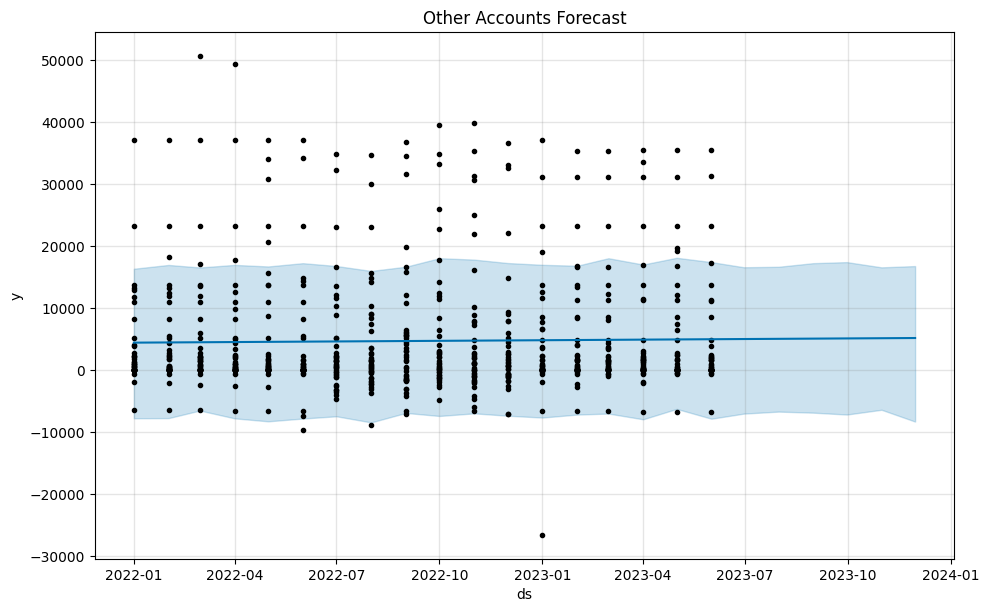

Forecasted Trend Line Data:
           ds        trend
0  2022-01-01  4374.464738
1  2022-02-01  4407.569906
2  2022-03-01  4437.471347
3  2022-04-01  4470.576218
4  2022-05-01  4502.613165
5  2022-06-01  4535.717862
6  2022-07-01  4567.754624
7  2022-08-01  4600.859231
8  2022-09-01  4633.963838
9  2022-10-01  4666.000465
10 2022-11-01  4699.104937
11 2022-12-01  4731.141242
12 2023-01-01  4764.245388
13 2023-02-01  4797.349489
14 2023-03-01  4827.249927
15 2023-04-01  4860.353025
16 2023-05-01  4892.388282
17 2023-06-01  4925.491381
18 2023-06-30  4956.458796
19 2023-07-31  4989.561895
20 2023-08-31  5022.664994
21 2023-09-30  5054.700251
22 2023-10-31  5087.803349
23 2023-11-30  5119.838606

Slope of the Forecasted Trend Line:
31.057244516016414


In [24]:
#rename columns for Prophet modelling
forecast_df3 = other_accounts_df[other_accounts_df['Exercise Type'] == 'Actuals'][['Month', 'Value']]
forecast_df3.rename(columns={'Month': 'ds', 'Value': 'y'}, inplace=True)

#initialize and fit Prophet model
model3 = Prophet()
model3.fit(forecast_df3)

#predict next 6 months
future3 = model3.make_future_dataframe(periods=6, freq='M')
forecast3 = model3.predict(future3)

#plot forecast
model3.plot(forecast3)
plt.title('Other Accounts Forecast')
plt.show()


#extract numeric data from forecasted trend line for more comprehensive reporting
trend3 = forecast3[['ds', 'trend']]
slope3 = (trend3['trend'].iloc[-1] - trend3['trend'].iloc[0]) / len(trend3)

print("Forecasted Trend Line Data:")
print(trend3)

print("\nSlope of the Forecasted Trend Line:")
print(slope3)

In [19]:
# Total value per account
account_totals =fpadata1.groupby('Account')['Value'].sum()

# Rank by absolute value but keep the positive or negative signs
account_totals_abs_ranked = account_totals.reindex(account_totals.abs().sort_values(ascending=False).index)

# Calculate percentage contribution by absolute value but keep the positive or negative signs
account_totals_pct_abs_ranked = (account_totals_abs_ranked / account_totals_abs_ranked.abs().sum()) * 100

print("Ranked by Absolute Value (with signs):")
print(account_totals_abs_ranked)

print("\nPercentage Contribution by Absolute Value (with signs):")
print(account_totals_pct_abs_ranked)


Ranked by Absolute Value (with signs):
Account
Building Rent                            10199734.00
Depreciation - Building Improvements      4976280.97
Depreciation - Furniture And Fixtures     2240142.56
Janitorial Services                       1713033.93
Depreciation - Building                   1567969.77
Misc R&M                                  1255537.39
Property Tax for Owned Real Property       899632.00
Light Bulbs/Electrical Supp.               858270.70
Electric                                   845058.48
Depreciation - Fixed Equipment             708055.53
CAM                                        605843.75
Furniture/Cube Moves/Installations         441039.94
HVAC Maintenance                           421444.18
Affiliate Contracts                        389578.12
Building/Ground Maintenance                364949.96
Property Tax For Leased Facilities         294823.54
Tenant Leases                             -229939.35
Gas                                        207535.07

<ipython-input-20-7079e97adc83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Account', y='Value', data=account_totals, palette='viridis')


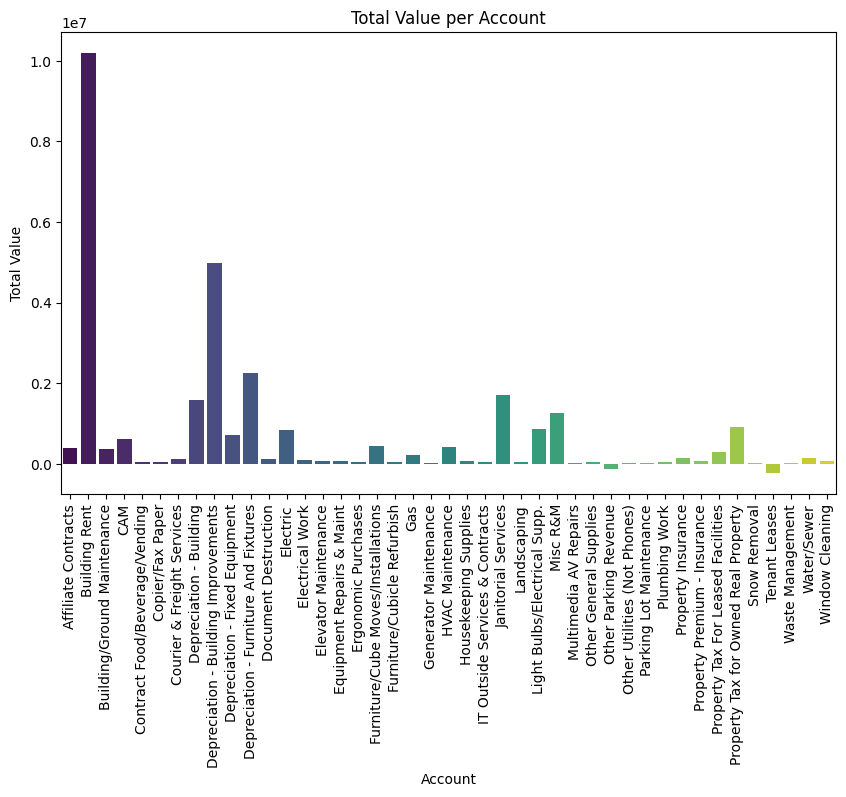

In [20]:
import seaborn as sns

account_totals = fpadata1.groupby('Account')['Value'].sum().reset_index()

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Account', y='Value', data=account_totals, palette='viridis')

# Add title and labels
plt.title('Total Value per Account')
plt.xlabel('Account')
plt.ylabel('Total Value')
plt.xticks(rotation=90)

# Show the plot
plt.show()

<ipython-input-21-3cef719968eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Account', y='Value', data=top_10_accounts, palette='viridis')


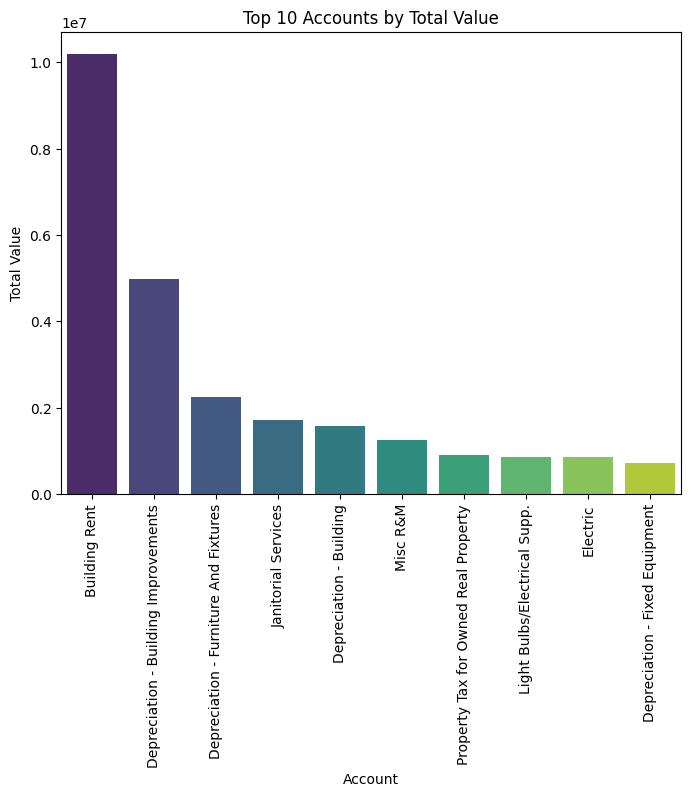

In [21]:
top_10_accounts = account_totals.reindex(account_totals['Value'].abs().sort_values(ascending=False).index).head(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Account', y='Value', data=top_10_accounts, palette='viridis')

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Add title and labels
plt.title('Top 10 Accounts by Total Value')
plt.xlabel('Account')
plt.ylabel('Total Value')

# Show the plot
plt.show()
